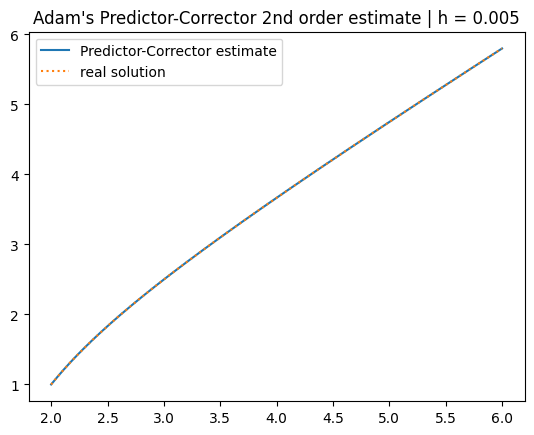

In [5]:
import matplotlib.pyplot as plt

######### settings ########
def f(t, y):
    return 1 + (t - y)**2
h = 0.005
t_0 = 2
t_max = 6
y_0 = 1
# second y-value calculated using RK4:
y_t = 1.833323 
###########################

def RK4(f, t_0, t_n, y_0, h):
    
    N = int((t_n - t_0) / h)
    y_list = [y_0]
    t_list = [t_0]

    for i in range(N):
        k_1 = h * (f(t_0, y_0))
        k_2 = h * (f((t_0 + h / 2), (y_0 + k_1 / 2)))
        k_3 = h * (f((t_0 + h / 2), (y_0 + k_2 / 2)))
        k_4 = h * (f((t_0 + h), (y_0 + k_3)))

        y_n = y_0 + (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6
        y_list.append(y_n)

        y_0 = y_n
        t_0 = t_0 + h
        t_list.append(t_0)
    
    return t_list, y_list

# second y-value calculated using RK4:
y_t = RK4(f, t_0 = t_0, t_n = t_max, y_0 = y_0, h = h)[1][1]

steps = int((t_max - t_0) / h) # calculate total steps

# initialise list of t values
t_minus = t_0 
t = t_0 + h
t_list = [t_minus, t]

# using y_1 calculated using RK4, initialising list of y values
y_t_minus = y_0
y_list = [y_t_minus, y_t]

for i in range(1, steps):
    t_plus = t + h
    t_list.append(t_plus)

    # get next y value:
    y_t_plus = y_t + (h / 2) * (3 * f(t, y_t) - f(t_minus, y_t_minus))
    y_t_plus = y_t + (h / 2) * (f(t_plus, y_t_plus) + f(t, y_t))
    y_list.append(y_t_plus)
    
    # update terms:
    y_t = y_t_plus
    y_t_minus = y_t  
    t_minus = t
    t = t_plus

# calculate true values
true_solution = lambda t: t + (1 / (1 - t))
true_values = [true_solution(t) for t in t_list]
errors = [abs(a - b) for a, b in zip(true_values, y_list)]

# plot calculated values against true values
plt.plot(t_list, y_list, '-', label = "Predictor-Corrector estimate")
plt.plot(t_list, true_values, ':', label = "real solution")
plt.legend()
plt.title("Adam's Predictor-Corrector 2nd order estimate | h = " + str(h))
plt.show()
